# Utiliser Kubernetes pour coordonner les microservices

Dans ce guide, nous allons parler des concepts de base derrière Kubernetes, un outil qui vous permet de gérer plusieurs conteneurs et de les coordonner, faisant ainsi fonctionner à l'unisson les microservices qui ont été déployés sur chaque conteneur.

Ce guide couvrira ce qu'est un orchestrateur de conteneurs et la nomenclature Kubernetes spécifique, comme les différences entre un pod, un service, un déploiement, etc. Nous apprendrons également comment analyser un cluster en cours d'exécution et effectuer d'autres opérations courantes afin que vous puissiez appliquer à notre exemple de microservices.


Dans ce guide, nous aborderons les sujets suivants : 

* Définition de l'orchestrateur Kubernetes 
* Comprendre les différents éléments de Kubernetes 
* Exécution d'opérations de base avec kubectl 
* Dépannage d'un cluster en cours d'exécution

À la fin de ce guide, vous connaîtrez les éléments de base de Kubernetes et serez capable d'effectuer des opérations de base. Vous découvrirez également les compétences de base en matière de dépannage afin de pouvoir détecter les problèmes possibles

## Définir l'orchestrateur Kubernetes

Kubernetes est un outil d'orchestration de conteneurs populaire. Il nous permet de gérer et de déployer plusieurs conteneurs qui interagissent les uns avec les autres de manière coordonnée. Étant donné que chaque microservice réside dans un conteneur individuel, comme nous l'avons mentionné au guide 1, ils peuvent fonctionner à l'unisson.

Kubernetes est destiné aux systèmes de production. Il a été conçu pour pouvoir contrôler de gros déploiements et faire abstraction de la plupart des détails de l'infrastructure. Chaque élément d'un cluster Kubernetes est configuré par programmation, et Kubernetes lui-même gère où déployer les clusters en fonction de la capacité disponible.


Kubernetes peut être entièrement configuré à l'aide de fichiers de configuration. Cela permet de répliquer des clusters, par exemple, en cas de sinistre complet entraînant la panne de tous les serveurs physiques. Vous pouvez même le faire avec un matériel différent, où les déploiements traditionnels pourraient être extrêmement difficiles.

Étant donné que Kubernetes fonctionne avec des conteneurs et facilite leur installation, il existe un grand écosystème de conteneurs prêts à ajouter des fonctionnalités à Kubernetes lui-même. Le meilleur exemple est probablement le tableau de bord Kubernetes (https://kubernetes.io/docs/tasks/access-application-cluster/web-ui-dashboard/  ), une interface utilisateur qui affiche un aperçu des opérations de Kubernetes. Il n'est pas installé par défaut, mais il peut être installé de la même manière que vous installez vos services. D'autres exemples de tels cas d'utilisation incluent la surveillance et la journalisation. Cela rend Kubernetes très extensible

## Comparer Kubernetes avec Docker Swarm

Kubernetes n'est pas le seul orchestrateur disponible. Comme nous l'avons mentionné au guide 3,Créer, exécuter et tester votre service à l'aide de Docker, il y a docker-compose. Docker Compose peut également orchestrer différents conteneurs et les coordonner mais sans avoir à gérer plusieurs serveurs

Docker a une extension native de docker-compose appelée Docker Swarm. Cela nous permet d'utiliser un cluster de machines pour exécuter docker-compose tout en réutilisant les mêmes fichiers YAML, mais avec quelques détails supplémentaires pour décrire comment vous voulez qu'ils s'exécutent.


    Vous pouvez en savoir plus sur Docker Swarm dans la documentation officielle (https://docs.docker.com/engine/swarm/)


Docker Swarm est plus facile à configurer que Kubernetes, en supposant que vous deviez gérer les serveurs. Au fur et à mesure que vous étendez les fonctionnalités de Docker Compose, vous constaterez qu'il a une faible courbe d'apprentissage.

D'un autre côté, Kubernetes est bien plus puissant et personnalisable. Il a une plus grande communauté et un rythme d'innovation plus élevé. C'est aussi mieux pour gérer les problèmes. Le plus gros problème est la configuration d'un cluster, 

La Configuration et sécurisation du système de production, de nos jours, il existe des déploiements commerciaux faciles que nous pouvons utiliser pour créer un cluster en quelques minutes, ce qui abaisse la barrière d'entrée pour Kubernetes.


Cela fait de Kubernetes (sans doute) une meilleure solution lorsque vous devez migrer à partir de l'ancien système et lorsque vous regardez vers l'avenir. Pour les petits déploiements, ou si vous devez déployer et gérer vos propres serveurs, Docker Swarm peut être une alternative intéressante

## Comprendre les différents Kubernetes elements

Kubernetes a sa propre nomenclature pour différents éléments. Nous utiliserons souvent la nomenclature dans ce guide, et la documentation Kubernetes les utilise également. Il est important de connaître les différences entre eux, car certains d'entre eux peuvent être subtils.



## Nœuds

Les principaux éléments d'infrastructure de Kubernetes sont appelés nœuds. Un cluster Kubernetes est composé d'un ou plusieurs nœuds, qui sont les machines physiques (ou machines virtuelles) qui prennent en charge l'abstraction du reste des éléments.

Chaque nœud doit pouvoir communiquer avec les autres, et ils s'exécutent tous dans un conteneur d'exécution, généralement Docker, mais ils peuvent utiliser d'autres systèmes, tels que rktlet 


Les nœuds créent un réseau entre eux qui achemine toutes les demandes qui ont été adressées au cluster afin que toute demande envoyée à n'importe quel nœud du cluster soit traitée de manière adéquate. Kubernetes gérera quel déployable va à quel nœud, même en récupérant les nœuds s'ils tombent en panne ou en les déplaçant d'un nœud à un autre s'il y a des problèmes de ressources.

Les nœuds n'ont pas nécessairement besoin d'être identiques et un certain degré de contrôle est nécessaire lorsqu'il s'agit de déployer des éléments spécifiques dans des nœuds spécifiques, mais pour des raisons de simplicité, ils sont normalement identiques.


Alors que les nœuds sont l'épine dorsale qui prend en charge le cluster, Kubernetes aide à s'éloigner de nœuds spécifiques en définissant le résultat souhaité et en laissant Kubernetes faire le gros du travail de décider ce qui va où et en s'assurant que les demandes des canaux de réseau internes sont envoyées aux services appropriés

## Plan de contrôle Kubernetes

Le plan de contrôle Kubernetes est l'endroit où sont conservés tous les processus que Kubernetes utilise pour configurer correctement une collection de serveurs en tant que nœuds dans un cluster Kubernetes. 


Les serveurs permettent aux nœuds de se connecter les uns aux autres, nous permettent de surveiller leur état actuel et nous permettent d'apporter toutes les modifications nécessaires en termes de déploiement, d'échelle, etc. 

Le nœud responsable de l'enregistrement et de la réalisation de ces modifications s'appelle le masternode. Il peut y avoir plus d'un nœud maître.

 Tout ce contrôle s'exécute normalement en coulisses. Son réseau est séparé du reste, ce qui signifie qu'un problème à ce niveau n'affectera pas le fonctionnement actuel du cluster, sauf que nous ne pouvons pas apporter de modifications.

## Objets Kubernetes

Les objets Kubernetes sont des abstractions qui représentent l'état du service déployé dans le cluster. Ils traitent principalement de l'exécution des conteneurs et des routages pour ces conteneurs, ainsi que du stockage persistant.

Jetons un coup d'œil aux différents éléments, du plus petit au plus grand. Cette liste n'est pas exhaustive; consultez la documentation Kubernetes pour plus de détails :


* Conteneur : un seul conteneur Docker. Ce sont les éléments constitutifs de Kubernetes, mais ils ne sont jamais présents seuls

* Pod : unité de base pouvant être déployée dans Kubernetes. Un pod est une collection d'un ou plusieurs conteneurs qui fonctionnent comme une unité, normalement à partir de différentes images. Normalement, un pod a un seul conteneur, mais parfois il peut être utile d'en avoir plus. Tous les conteneurs du même pod partagent la même adresse IP (le pod IP), ce qui signifie qu'un conteneur qui accède à un port dans localhost peut accéder à un autre conteneur à la place. C'est en fait le moyen recommandé de communiquer avec eux


    
    Tout cela vous paraîtra un peu étrange au début, mais normalement, les pods
    multi-conteneurs auront un conteneur principal et quelque chose d'autre qui
    effectue des tâches auxiliaires, telles que l'exportation de métriques.

* ConfigMap : définit un ensemble de paires clé-valeur qui peuvent être injectées dans les pods, généralement sous forme de variables d'environnement ou de fichiers. Cela nous permet de partager des configurations entre différents pods définis, par exemple, pour que tous les conteneurs enregistrent les informations de débogage. Notez que les pods peuvent avoir leur propre configuration, mais ConfigMaps est un moyen pratique de partager les mêmes valeurs afin qu'elles soient disponibles pour différents pods.

* Volume : Les fichiers qui se trouvent à l'intérieur d'un conteneur sont éphémères et seront perdus si le conteneur arrête son exécution. Un volume est une forme de stockage persistant qui peut être utilisé pour conserver les informations de données entre les démarrages et pour partager des informations entre les conteneurs d'un pod.

* Deployment : il s'agit d'un regroupement d'un ou plusieurs pods identiques. La définition du déploiement indiquera le nombre souhaité et Kubernetes s'efforcera d'y parvenir, selon la stratégie définie. Les pods d'un même déploiement peuvent être déployés sur différents nœuds, et le seront normalement. Si l'un des pods est supprimé, terminé ou rencontre un problème, le déploiement en démarrera un autre jusqu'à ce que le nombre défini soit atteint

* Job : un job crée un ou plusieurs pods qui devraient se terminer. Alors que le déploiement supposera que tout pod qui se termine est un problème et en démarrera un autre, les tâches réessayeront jusqu'à ce que le nombre approprié de succès soit atteint. Les pods finis ne sont pas supprimés, ce qui signifie que nous pouvons vérifier leurs journaux. Les travaux sont des exécutions ponctuelles. Il existe également des tâches Cron, qui s'exécuteront à des heures spécifiques.


* Service. Étant donné que les pods sont créés et recréés et ont des adresses IP différentes, pour permettre aux services d'y accéder, un service doit définir le nom que d'autres éléments peuvent utiliser pour le découvrir. En d'autres termes, il achemine les requêtes vers les pods appropriés. Normalement, un service et un déploiement seront liés, le service rendant le déploiement accessible et en boucle entre tous les pods définis. Un service peut également être utilisé pour créer un nom interne pour un service externe


* Ingress : alors qu'un service est interne, une entrée est externe. Il achemine toutes les demandes externes vers le service approprié afin qu'elles puissent être traitées. Vous pouvez définir différentes entrées par nom d'hôte, ce qui garantit que le cluster est acheminé vers différents services par l'hôte cible de la demande, ou qu'une seule entrée est hébergée en fonction de son chemin. En interne, une entrée est implémentée en tant que conteneur qui implémente le contrôleur d'entrée, qui est nginx par défaut


* Namespace : il s'agit de la définition d'un cluster virtuel. Vous pouvez définir plusieurs espaces de noms dans le même cluster Kubernetes physique. Chaque nom défini sous un espace de noms doit être unique, mais un autre espace de noms pourrait utiliser la même définition. Les objets dans différents espaces de noms ne peuvent pas communiquer entre eux en interne, mais ils peuvent le faire en externe


Les objets peuvent être trouvés dans des fichiers .yaml, qui peuvent être chargés dans le système. Un seul fichier .yaml peut définir plusieurs objets, par exemple, un déploiement qui définit des pods contenant des conteneurs.

 Le schéma suivant résume les différents objets disponibles.

 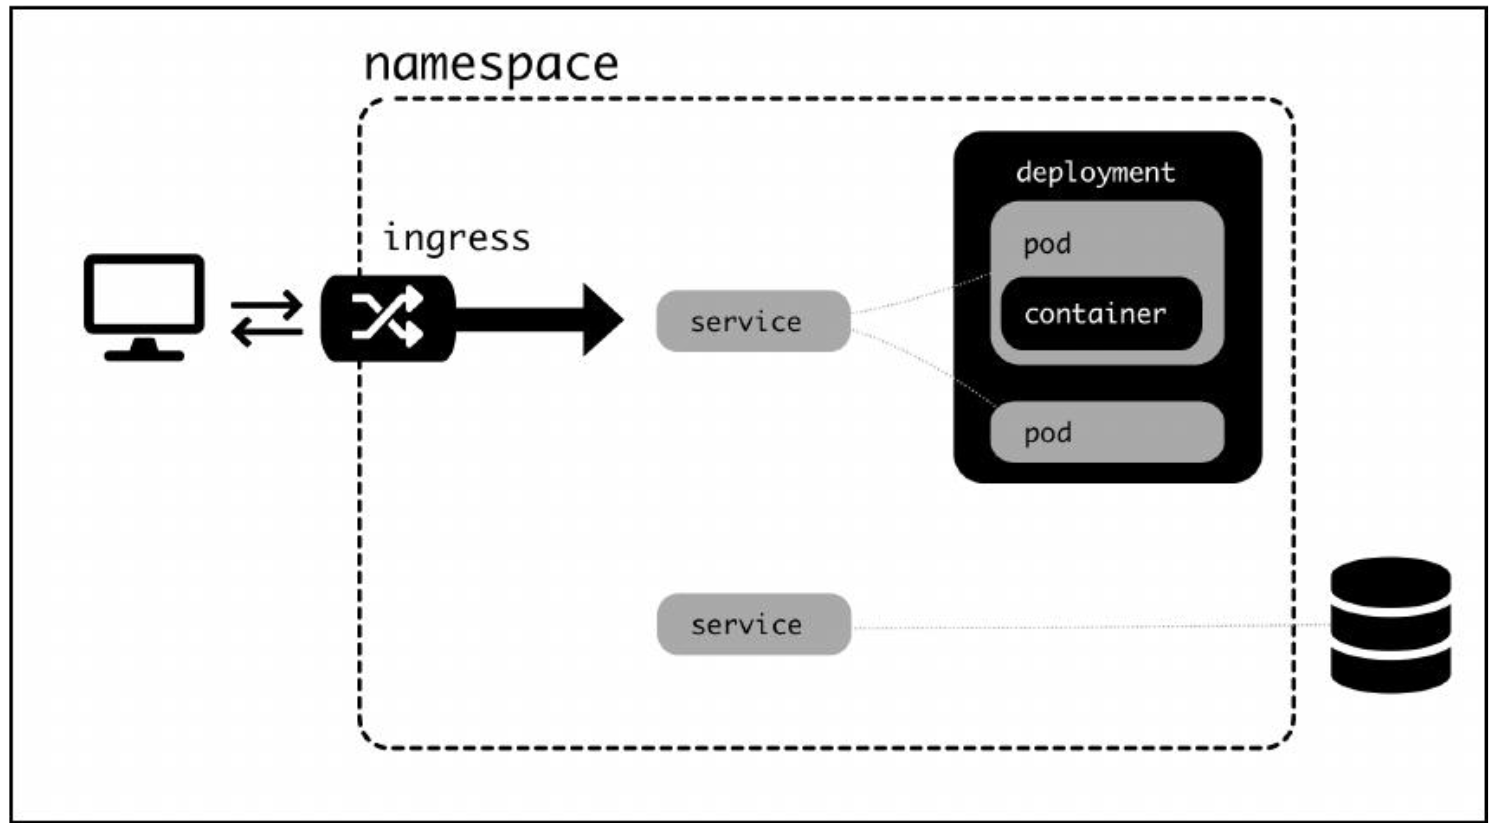

Les job et les volumes ne sont pas présents, mais deux services sont disponibles : un qui pointe vers le déploiement et un autre qui pointe vers un service externe. Le service externe est destiné aux éléments internes et n'est pas exposé à l'extérieur.

## Effectuer des opérations de base avec kubectl

En utilisant kubectl, nous pouvons effectuer des opérations sur tous les différents éléments. Nous avons déjà eu un aperçu de get pour avoir une idée des éléments disponibles


Nous pouvons utiliser kubectl pour créer un nouvel élément. Par exemple, pour créer et lister des espaces de noms, nous pouvons utiliser le code suivant


    $ kubectl create namespace example
    namespace/example created

    $ kubectl get namespaces
    NAME        STATUS AGE
    default     Active 260d
    docker      Active 260d
    example     Active 9s
    kube-public Active 260d
    kube-system Active 260d

Nous pouvons créer divers éléments, dont certains seront examinés tout au long de ce guide


## Définir un élément

Un namespace  est un cas particulier car il ne nécessite aucune configuration. Pour créer un nouvel élément, un fichier YAML doit être créé pour décrire cet élément. Par exemple, nous pouvons créer un nouveau pod en utilisant l'image officielle NGINX dans Docker Hub



    ---
    apiVersion: v1
    kind: Pod
    metadata:
      name: nginx
      namespace: example
    spec:
      containers:
        - name: nginx
          image: library/nginx:latest

Au minimum, un élément doit contenir les éléments suivants :

* La version API de l'élément.
* Le type de l'élément
* Un nom pour l'élément, ainsi qu'un espace de noms pour celui-ci
* Une (spec) section de spécifications qui inclut des détails de configuration. Pour un pod, nous devons ajouter les conteneurs nécessaires.


Nous allons enregistrer ce fichier sous example_pod.yml. Nous allons le créer à l'aide de la commande apply et surveiller son exécution avec les commandes suivantes :


    $ kubectl apply -f example_pod.yml
    pod/nginx created

    $ kubectl get pods -n example

    NAME  READY STATUS            RESTARTS AGE
    nginx 0/1   ContainerCreating 0        2s
    
    $ kubectl get pods -n example
    NAME  READY STATUS  RESTARTS AGE
    nginx 1/1   Running 0        51s

Nous pouvons maintenant exécuter dans le conteneur et exécuter des commandes à l'intérieur. Par exemple, pour vérifier que le serveur NGINX est en cours d'exécution et sert des fichiers, nous pouvons utiliser le code suivant :


    kubectl exec -it nginx -n example /bin/bash

Le pod peut être changé de deux manières. La première consiste à exécuter manuellement edit, qui ouvre votre éditeur de terminal prédéfini afin que vous puissiez modifier le fichier :


    $ kubectl edit pod nginx -n example


Vous verrez le pod avec tous ses paramètres par défaut. Cette façon de changer un pod est utile pour de petits tests, mais en général, il est préférable de modifier le fichier YAML d'origine afin de pouvoir suivre les changements qui se produisent. Par exemple, nous pouvons modifier NGINX afin d'en utiliser une version précédente :



  ---
    apiVersion: v1
    kind: Pod
    metadata:
      name: nginx
      namespace: example
    spec:
      containers:
        - name: nginx
          image: library/nginx:1.16

Ensuite, nous pouvons appliquer à nouveau ces modifications, ce qui redémarrera le pod :


    $ kubectl apply -f example_pod.yml
    pod/nginx configured
    
    $ kubectl get pods -n example
    NAME  READY STATUS  RESTARTS AGE
    nginx 1/1   Running 1        36s


Obtenir plus d'informationsLa commande get accepte plus de configuration. Vous pouvez récupérer plus d'informations en utilisant l'option de sortie large :


     $ kubectl get pods -n example -o wide
     NAME  READY STATUS  RESTARTS AGE IP        NOD
     Enginx 1/1   Running 1        30m 10.1.0.11 docker-for-desktop

Si vous apportez un changement et êtes intéressé par les changements que cela produit, vous pouvez utiliser l'argument -w pour surveiller tout changement. Par exemple, le code suivant montre les résultats du redémarrage d'un pod. Ce redémarrage a été produit en raison d'une modification apportée à l'image du conteneur :


    $ kubectl get pods -n example -w
    NAME  READY STATUS  RESTARTS AGE
    nginx 1/1   Running 2        32mnginx 1/1   Running 3        32m

Si vous avez besoin de plus d'informations sur un élément particulier, vous pouvez le décrire


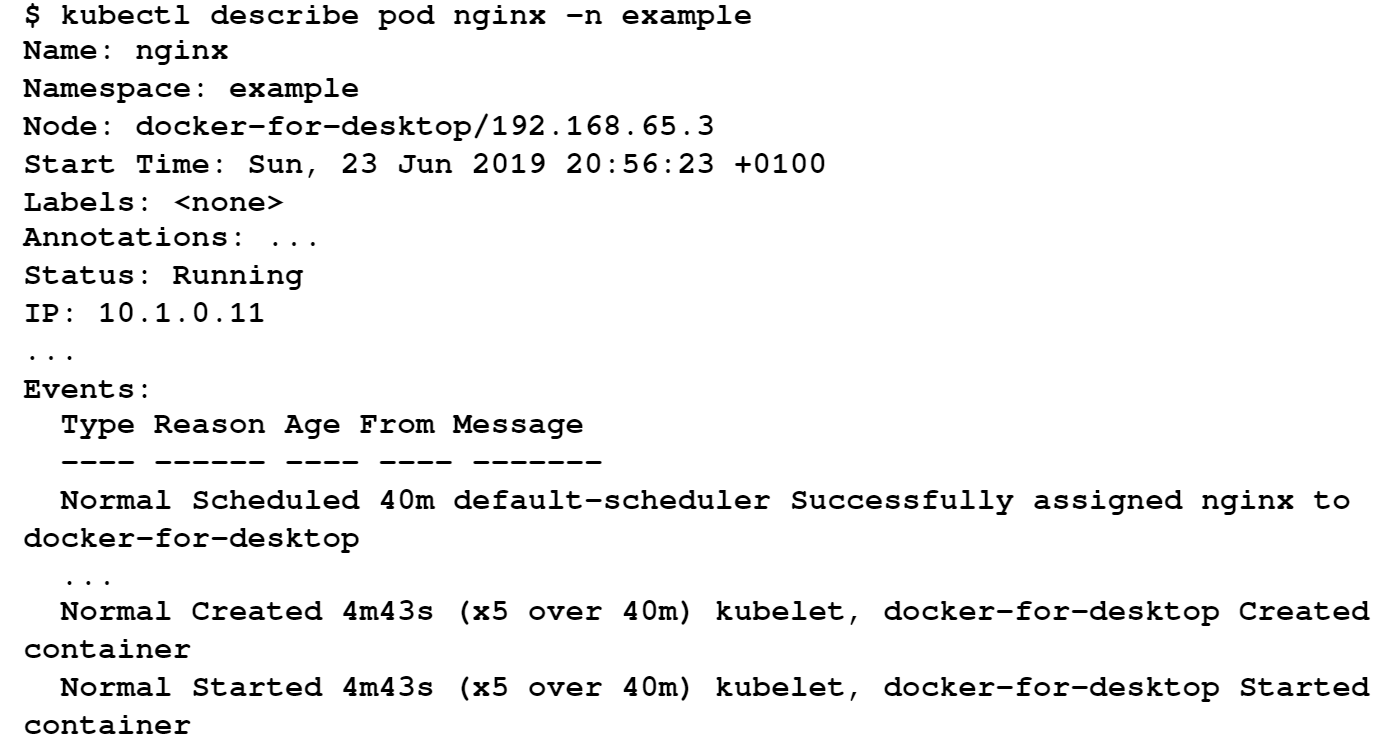

Cela renvoie beaucoup d'informations. Les informations les plus utiles concernent normalement les événements, qui renvoient des informations sur le cycle de vie de l'élément.



## Supprimer un élément

La commande delete supprime un élément et tout ce qu'il contient :


    $ kubectl delete namespace example
    namespace "example" deleted
    
    $ kubectl get pods -n example
    No resources found.

Sachez que, parfois, la suppression d'un élément entraîne sa recréation. Ceci est assez courant lorsque des pods sont créés via des déploiements, car le déploiement fonctionnera pour obtenir le nombre de pods au nombre configuré.

## Dépannage d'un cluster en cours d'exécution

Les principaux outils que nous pouvons utiliser pour résoudre les problèmes dans Kubernetes sont les commandes get et describe. 

D'après mon expérience, le problème le plus courant lors de l'exécution de Kubernetes est que, parfois, certains pods ne démarrent pas. Les étapes de dépannage sont les suivantes


* 1. L'image du conteneur est-elle correcte ? Un problème avec le téléchargement de l'image affichera ErrImagePull. Cela peut être dû au fait que l'image ne peut pas être téléchargée à partir du registre en raison d'un problème d'authentification.

* 2. Un statut de CrashLoopBackOff signifie que le processus pour le conteneur a été interrompu. Le pod essaiera de redémarrer encore et encore. Ceci est normalement causé par un problème sous-jacent avec le conteneur. Vérifiez que la configuration est correcte. Vous pouvez vérifier les journaux stdout d'un conteneur en utilisant la commande suivante


    $ kubectl logs <pod> -n <namespace> -c <container>


Assurez-vous que le conteneur est exécutable. Essayez de l'exécuter manuellement à l'aide de la commande suivante :

    $ docker run <image>

* 3. Un pod n'est pas exposé à l'extérieur. Cela est généralement dû à un problème dans le service et/ou Ingress qui les expose. Vous pouvez détecter si un pod est réactif à l'intérieur du cluster en utilisant exec pour entrer dans un autre conteneur, puis essayez d'accéder au service et à l'adresse IP interne du pod, normalement en utilisant curl


Lors du dépannage, n'oubliez pas que les pods et les conteneurs sont accessibles via des commandes exec, ce qui nous permettra de vérifier les processus en cours, les fichiers et bien plus encore. Ceci est similaire à l'accès au Terminal d'un serveur physique. Vous pouvez le faire en utilisant le code suivant :


    $ kubectl exec -it <pod> -n <namespace> /bin/sh

Soyez prudent car la nature des clusters Kubernetes peut vous obliger à vérifier un conteneur spécifique dans un pod s'il y a plusieurs conteneurs en cours d'exécution dans le même pod.

